Plotting the highest fidelity reached by Q learning for different parameters 

Import Packages

In [1]:
from numpy import *
import cmath
from random import randrange
import pandas as pd
import time
from IPython.display import clear_output
import scipy
import matplotlib.pyplot as plt

Define gates and states

In [2]:
aar = []
bar = []
for a in range(0,3):
    at = a/3
    aar.append(at)
    b = sqrt(1 - at**2)
    bar.append(b)

In [5]:
one = array([[int(0)], [int(1)]])
zero = array([[int(1)], [int(0)]])
plus = (1/(sqrt(2)))*(zero + one)

In [6]:
X = array([[0 , 1], [1, 0]])
Z = array([[1,0],[0,-1]])
Iden = array([[1 , 0], [0, 1]])
Y = array([[0 , -1j], [1j, 0]])
H = (1/(sqrt(2)))*array([[1 , 1], [1, -1]])
S = array([[1 , 0], [0, 1j]])


Create list of actions and list of initial states

In [7]:
list2 = [Iden, X, Y, Z, H, S]

In [8]:
def mag(state):
    prod = (transpose(state.conjugate()).dot(state))*(transpose(state.conjugate()).dot(state))
    return(asscalar(prod))

In [320]:
def fidelitym(guess, right):
    den1 = guess.dot(transpose(guess.conjugate()))
    #print(den1)
    #print(sqrt(den1))
    den2 = right.dot(transpose(right.conjugate()))
    #print(scipy.sqrt(den2))
    #print(sqrt(den2))
    mult = (scipy.sqrt(den1)).dot((den2).dot(scipy.sqrt(den1)))
    #print(mult)
    root = scipy.sqrt(mult)
    #print(root)
    score = trace(mult)
    return(abs(score))

In [9]:
def fidelityp(guess, right):
    mult = (transpose(guess.conjugate())).dot(right)*(transpose(right.conjugate())).dot(guess)
    #print(mult)
    root = asscalar((scipy.sqrt(mult)))
    return(abs(root))

First set up the dataframe with the correct columns and some initial states

In [10]:
Q_table = pd.DataFrame()

In [11]:
for i in range(0,len(aar)):
    new4 = aar[i]*zero + bar[i]*one
    for m in range(0,len(list2)):
        gate = m
        new = (list2[m].dot(new4))
        Q = pd.DataFrame({'state': str(new4), 'gate':gate, 'new':str(new) ,'Q':0}, index=[0])
        Q_table = Q_table.append(Q)


It's easier to call upon cells in string format rather than array format

In [14]:

Q_tablestr = Q_table.drop_duplicates()
Q_tablestr = Q_tablestr.reset_index(drop=True)
#Q_tablestr

Set variables - these may need to be played about with more to find optimal values

In [15]:
table = Q_tablestr.copy()
table

,state,gate,new,Q
0,[[0.]\n [1.]],0,[[0.]\n [1.]],0
1,[[0.]\n [1.]],1,[[1.]\n [0.]],0
2,[[0.]\n [1.]],2,[[0.-1.j]\n [0.+0.j]],0
3,[[0.]\n [1.]],3,[[ 0.]\n [-1.]],0
4,[[0.]\n [1.]],4,[[ 0.70710678]\n [-0.70710678]],0
5,[[0.]\n [1.]],5,[[0.+0.j]\n [0.+1.j]],0
6,[[0.33333333]\n [0.94280904]],0,[[0.33333333]\n [0.94280904]],0
7,[[0.33333333]\n [0.94280904]],1,[[0.94280904]\n [0.33333333]],0
8,[[0.33333333]\n [0.94280904]],2,[[0.-0.94280904j]\n [0.+0.33333333j]],0
9,[[0.33333333]\n [0.94280904]],3,[[ 0.33333333]\n [-0.94280904]],0


In [25]:
alpha = 0.5 #how much we update Q for every new action
gamma = 0.9 #discount factor 

num_repeats = 200
right = (1/5)*zero - sqrt(1 - (1/5)**2)*one
table = Q_tablestr.copy()

In [26]:
allarray = []
for runs in range (0,1):
    goalarray = []
    for ri in range (0,10):
    
        #gamma = ri/10
        goals = 0
        #print(alpha)
        table = Q_tablestr.copy()
        maxfid=0
        for repeats in range(0,num_repeats):
            k = randrange(len(aar))# choose a random state from list to start 
            #k=2
            psiold = aar[k]*zero + bar[k]*one
            reward = 0 # reset award
            for t in range(0,10): #begin steps
                reward += 0.1 #add more penalty with each step
        
                sec = table[table['state']==str(psiold)] #choose the part of the dataframe that contains the current state
                #print(sec)
                gather = pd.DataFrame() #dataframe to collect all possible new states 
                for n in range(0,(len(sec))): #iterate through the rows that contain the current state
                    for z in range(0,len(list2)): # find the action associated with the state in each row
                        if(sec.iloc[n]['gate']== z):
                            apply = array(list2[z])
                            zed = z
                    
                    psinew = apply.dot(psiold) #create new state by applying action
                
                
                    news = table[table['state']==str(psinew)] #choose part of dataframe that contains the new state
                    #print(news)
                    if len(news) == 0: #if the new state is not in the dataframe, insert it with all the possible actions
                        for s in range(0,len(list2)):
                            lad = list2[s].dot(psinew)
                            news = pd.DataFrame({'state' : str(psinew), 'gate':s, 'new':str(lad) ,'Q':0}, index=[0])
                            table = table.append(news)
                    
                    maxQ = max(news['Q']) #find the max Q value the new state
                    gather = gather.append(news).drop_duplicates() #create a dataframe of all possible new states
                    plus = 0 #reset award
                    if (fidelityp(psiold, right)) > 0.99999999999:
                        plus = 5
                    #elif (fidelityp(psiold, right)) > 0.999: #insert a reward if the new state is the one we want
                     #   plus = 1
                    elif (fidelityp(psiold, right)) > (80):
                        plus = (fidelityp(psiold, right))
                    else:
                        plus = 0
                
                    if (fidelityp(psiold, right)) > maxfid:
                        maxfid = (fidelityp(psiold, right))
            
                    table.loc[(table.state == str(psiold)) & (table.gate == zed), 'Q'] += alpha*((plus - reward) + gamma*(maxQ) - sec.iloc[n]['Q'])
                    #update the Q value of the old state based on the rewards given by the new state
        
                #print(gather)
                if plus == 5: #If we have reached the state we want we can stop
                    print('goal reached')
                    goals += 1
                    #print(psiold)
                    break
                else:
                    top = gather.loc[(gather.Q == max(gather['Q']))] #collect the max Q value from all possible new states
                    toparray =[] #sort these into an array with their associated action
                    actarray =[]
                    for o in range(0,len(top)):
                        for p in range(0,len(list2)):
                            if (str((array(list2[p])).dot(psiold)) == (top.iloc[o]['state'])):
                                toparray.append((array(list2[p])).dot(psiold))
                                actarray.append(p)
        
                    garray =[] #create an array of all possible new states with associated actions
                    actg = []
                    for a in range(0,len(top)):
                        for b in range(0,len(list2)):
                            if (str((array(list2[b])).dot(psiold)) == (gather.iloc[a]['state'])):
                                garray.append((array(list2[b])).dot(psiold))
                                actg.append(b)
        
                    q = randrange(100)
                    if q > (ri*10): #Create a percentage chance that the next state will be one with a max Q value (expoitation) or a state obtained from a random action (exploration)
                        r = randrange(len(toparray))
                        psiold = toparray[r]
                        action = actarray[r]
                    else:
                        r = randrange(len(garray))
                        psiold = garray[r]
                        action = actg[r]
        
                #print(str(t) + 'th state is ' + str(psiold) + ' after action ' + str(action))
            #print(repeats)
        
        
        goalarray.append(maxfid)
        print('threshold: ' + str(ri))
    
    allarray.append(goalarray)
    print('repeat: ' + str(runs))


    
    

threshold: 0
threshold: 1
threshold: 2
threshold: 3
threshold: 4
threshold: 5
threshold: 6
threshold: 7
threshold: 8
threshold: 9
repeat: 0


In [27]:
avgarray1 = []
for jj in range(0, len(goalarray)):
    avgarray1.append(0)
    print(avgarray1)
    for kk in range(0,len(allarray)):
        avgarray1[jj] += allarray[kk][jj]
    avgarray1[jj] = avgarray1[jj]/len(allarray)

avgarray1

[0]
[0.9904270973700678, 0]
[0.9904270973700678, 0.9904270973700678, 0]
[0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0]
[0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0]
[0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0]
[0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0]
[0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0]
[0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0]
[0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0.9904270973700678, 0]


[0.9904270973700678,
 0.9904270973700678,
 0.9904270973700678,
 0.9904270973700678,
 0.9904270973700678,
 0.9904270973700678,
 0.9904270973700678,
 0.9904270973700678,
 0.9904270973700678,
 0.9904270973700678]

Show different plots for different parameters

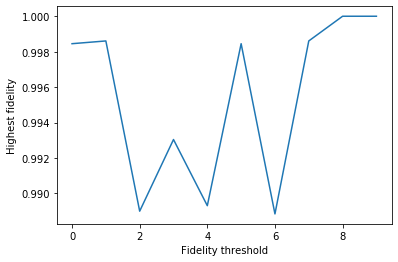

In [82]:
avgarray

plt.plot(avgarray)
plt.ylabel('Highest fidelity')
plt.xlabel('Fidelity threshold')
plt.show()

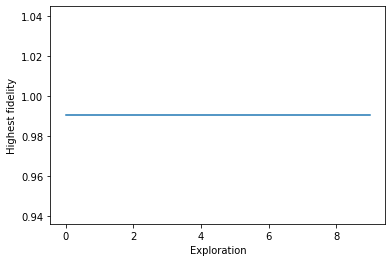

In [29]:
avgarray1

plt.plot(avgarray1)
plt.ylabel('Highest fidelity')
plt.xlabel('Exploration')
plt.show()

In [521]:
#table[table['new'] == str(right)]
table[table['new'] == str(right)]

,state,gate,new,Q
16,[[0.66666667]\n [0.74535599]],4,[[ 0.9984508 ]\n [-0.05564176]],43.103286
0,[[ 0.9984508 ]\n [-0.05564176]],0,[[ 0.9984508 ]\n [-0.05564176]],47.393757
0,[[-0.05564176]\n [ 0.9984508 ]],1,[[ 0.9984508 ]\n [-0.05564176]],0.000000
0,[[0.9984508 ]\n [0.05564176]],3,[[ 0.9984508 ]\n [-0.05564176]],0.000000


In [522]:
table.sort_values("Q", ascending=False).head(20)

,state,gate,new,Q
0,[[ 0.9984508 ]\n [-0.05564176]],0,[[ 0.9984508 ]\n [-0.05564176]],47.393757
0,[[ 0.9984508 ]\n [-0.05564176]],4,[[0.66666667]\n [0.74535599]],43.548797
16,[[0.66666667]\n [0.74535599]],4,[[ 0.9984508 ]\n [-0.05564176]],43.103286
12,[[0.66666667]\n [0.74535599]],0,[[0.66666667]\n [0.74535599]],39.197692
0,[[0.94280904]\n [0.33333333]],0,[[0.94280904]\n [0.33333333]],5.485867
0,[[ 0.9984508 ]\n [-0.05564176]],2,[[0.+0.05564176j]\n [0.+0.9984508j ]],4.798328
0,[[ 0.9984508 ]\n [-0.05564176]],1,[[-0.05564176]\n [ 0.9984508 ]],4.798328
0,[[ 0.9984508 ]\n [-0.05564176]],3,[[0.9984508 ]\n [0.05564176]],4.798328
0,[[ 0.9984508 ]\n [-0.05564176]],5,[[0.9984508+0.j ]\n [0. -0.055641...,4.798328
0,[[0.94280904]\n [0.33333333]],1,[[0.33333333]\n [0.94280904]],4.791236


In [498]:
right

array([[ 0.83424168],
       [-0.55139897]])

Show what actions are taken when following the max Q value for each state action pair

In [523]:
final = pd.DataFrame() #Dataframe to store state action pairs for top Q values for each agent
tots1 = pd.DataFrame() #Dataframe to store all Q values of all agents
for m in range(0,len(aar)):
    oppa = table.loc[(table.state == str(aar[m]*zero + bar[m]*one))] #select the rows with the initial state
    lol = oppa.sort_values("Q", ascending=False) #sort according to Q value
    top = lol.head(1) #Choose the state action pair with the top Q value
    for n in [0, 1, 2, 3]:
        
        oppa1 = table.loc[(table.state == top['new'].values[n])] #Find the state that results from the top action being applied
        lol = oppa1.sort_values("Q", ascending=False) #find the max Q value of next state
        top1 = lol.head(1)
        
        top = top.append(top1) #add it to the dataframe of steps
        #print(top1)
         
    final = final.append(top) #add this agents top first 4 steps to the other agents top first 4 steps

In [524]:
final

,state,gate,new,Q
4,[[0.]\n [1.]],4,[[ 0.70710678]\n [-0.70710678]],2.969070
0,[[ 0.70710678]\n [-0.70710678]],0,[[ 0.70710678]\n [-0.70710678]],3.638243
0,[[ 0.70710678]\n [-0.70710678]],0,[[ 0.70710678]\n [-0.70710678]],3.638243
0,[[ 0.70710678]\n [-0.70710678]],0,[[ 0.70710678]\n [-0.70710678]],3.638243
0,[[ 0.70710678]\n [-0.70710678]],0,[[ 0.70710678]\n [-0.70710678]],3.638243
7,[[0.33333333]\n [0.94280904]],1,[[0.94280904]\n [0.33333333]],4.775119
0,[[0.94280904]\n [0.33333333]],0,[[0.94280904]\n [0.33333333]],5.485867
0,[[0.94280904]\n [0.33333333]],0,[[0.94280904]\n [0.33333333]],5.485867
0,[[0.94280904]\n [0.33333333]],0,[[0.94280904]\n [0.33333333]],5.485867
0,[[0.94280904]\n [0.33333333]],0,[[0.94280904]\n [0.33333333]],5.485867
